# Tarea 1

### Primera parte  
  
Utilizar la base de datos OnlineRetail.csv para responder lo siguiente:

    1. Graficar la cantidad de ordenes (Invoice) por cada día de la semana. ¿Qué día se producen la mayor cantidad de ordenes y cuando la menor?
    2. ¿Cuales son los 5 países que más gastan en promedio? Graficar y tabla.
    3. Hay items que la empresa entrega de regalo, ¿Cuantos se regalaron?. Indicar cantidad por mes. (usar supuesto)

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
# Lectura del dataframe

df_retail = pd.read_csv("https://raw.githubusercontent.com/patriciomalleag/Proyectos_Analisis_Varios/master/DS_Module_4/Homework_1/OnlineRetail.csv", sep=",", encoding = "ISO-8859-1")

In [3]:
# Dimensión del dataframe

df_retail.shape

(541909, 8)

In [4]:
# Primeros 5 elementos

df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
# Información de los datos

df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


---

Viendo los datos y los resultados para los tipos de datos, el primer detalle que encontramos a priori es el tipo de dato que tiene el campo *InvoiceDate*, el cual debería ser del tipo datetime, no obstante por defecto pandas lo reconocio como object. Debemos hacer una transformación para este campo.  
  
Otro detalle es que tanto el campo *Description* como el campo *CustomerID* tienen algunos nulos. Vale la pena más adelante analizar por qué ocurre esto.

---

In [6]:
# Estadísticos descriptivos

df_retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


---

Tanto el campo *Quantity* como el campo *UnitPrice* tienen valores negativos. Realicemos un análisis rápido de lo que ocurre.

---

In [7]:
# UnitPrice menor que 0

df_uprice_less_0 = df_retail[(df_retail["UnitPrice"]<0)].sort_values(by=['UnitPrice'])
df_uprice_less_0

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


---

Los registros negativos en el campo *UnitPrice* corresponden al parecer a ajustes de crédito por lo que no los consideraremos en el análisis.

---

In [8]:
# Quantity menor que 0

df_qty_less_0 = df_retail[(df_retail["Quantity"]<0)]
df_qty_less_0

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


---

Los registros negativos en el campo *Quantity* corresponden al parecer a devoluciones, descuentos u otros. No obstante ya que en la pregunta 3 se nos indica que la tienda regala ciertos objetos, revisaremos las descripciones de los que tienen *UnitPrice* 0 para este dataframe.

---

In [9]:
# Lista de Quantity<0 y UnitPrice==0

list(df_qty_less_0[df_qty_less_0["UnitPrice"]==0].Description.drop_duplicates())

[nan,
 '?',
 'check',
 'damages',
 'faulty',
 'Dotcom sales',
 'reverse 21/5/10 adjustment',
 'mouldy, thrown away.',
 'counted',
 'Given away',
 'Dotcom',
 'label mix up',
 'samples/damages',
 'thrown away',
 'incorrectly made-thrown away.',
 'showroom',
 'MIA',
 'Dotcom set',
 'wrongly sold as sets',
 'Amazon sold sets',
 'dotcom sold sets',
 'wrongly sold sets',
 '? sold as sets?',
 '?sold as sets?',
 'Thrown away.',
 'damages/display',
 'damaged stock',
 'broken',
 'throw away',
 'wrong barcode (22467)',
 'wrong barcode',
 'barcode problem',
 '?lost',
 "thrown away-can't sell.",
 "thrown away-can't sell",
 'damages?',
 're dotcom quick fix.',
 "Dotcom sold in 6's",
 'sold in set?',
 'cracked',
 'sold as 22467',
 'Damaged',
 'mystery! Only ever imported 1800',
 'MERCHANT CHANDLER CREDIT ERROR, STO',
 'POSSIBLE DAMAGES OR LOST?',
 'damaged',
 'DAMAGED',
 'Display',
 'Missing',
 'wrong code?',
 'wrong code',
 'adjust',
 'crushed',
 'damages/showroom etc',
 'samples',
 'damages/credits

---

Al parecer todos son productos averiados, por lo que podemos también descartar este subconjunto para nuestro análisis. Ahora revisaremos los registros con *UnitPrice* igual a 0 y *Quantity* positivo. Eliminaremos los Description NaN para facilidad de análisis,

---

In [10]:
# Quantity>0 y UnitPrice==0

df_uprice_0 = df_retail[ (df_retail["Quantity"]>0) & (df_retail["UnitPrice"]==0) ]
list(df_uprice_0[df_uprice_0["Description"].notna()].Description.drop_duplicates())

['amazon',
 'ROUND CAKE TIN VINTAGE GREEN',
 'CREAM SWEETHEART LETTER RACK',
 'ZINC WILLIE WINKIE  CANDLE STICK',
 'BOX OF 24 COCKTAIL PARASOLS',
 'DOORMAT ENGLISH ROSE ',
 'DOORMAT 3 SMILEY CATS',
 'GREEN REGENCY TEACUP AND SAUCER',
 'FRENCH BLUE METAL DOOR SIGN 7',
 'FRENCH BLUE METAL DOOR SIGN 5',
 'FRENCH BLUE METAL DOOR SIGN 6',
 'FRENCH BLUE METAL DOOR SIGN 4',
 'FRENCH BLUE METAL DOOR SIGN No',
 'FRENCH BLUE METAL DOOR SIGN 8',
 'FRENCH BLUE METAL DOOR SIGN 1',
 'RED KITCHEN SCALES',
 'IVORY KITCHEN SCALES',
 'SET OF 6 SOLDIER SKITTLES',
 'CHILDS GARDEN TROWEL BLUE ',
 'CHILDRENS GARDEN GLOVES BLUE',
 'PICNIC BASKET WICKER SMALL',
 'PICNIC BASKET WICKER LARGE',
 'EMPIRE UNION JACK TV DINNER TRAY',
 'TV DINNER TRAY VINTAGE PAISLEY',
 'SPACEBOY TV DINNER TRAY',
 'TV DINNER TRAY DOLLY GIRL',
 'CHILDS GARDEN SPADE BLUE',
 'CHILDS GARDEN RAKE BLUE',
 'WATERING CAN PINK BUNNY',
 'ENAMEL FIRE BUCKET CREAM',
 'ENAMEL FLOWER JUG CREAM',
 'AIRLINE BAG VINTAGE JET SET WHITE',
 'AIRLINE BAG

---

Acá nuestro primer gran supuesto, es que todos los productos que tienen *UnitPrice* igual a 0, *Quantity* positiva y que sea lógicamente un producto, son regalos de la tienda. Para transformar esto a código, y luego de ver las descripciones, solo nos quedaremos con los registros que tengan *Description* en mayúsculas (Salvo AMAZON y DOTCOM POSTAGE). Esto último es nuestro segundo supuesto, que solo nos quedaremos con los registros con *Description* en mayúsculas.

---

In [11]:
df_gift = df_uprice_0[(df_uprice_0["Description"].str.isupper()==True) & (df_uprice_0["Description"]!="AMAZON") & (df_uprice_0["Description"]!="DOTCOM POSTAGE")]

In [12]:
df_gift

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany
14335,537534,85064,CREAM SWEETHEART LETTER RACK,1,12/7/2010 11:48,0.0,NaN,United Kingdom
14336,537534,84832,ZINC WILLIE WINKIE CANDLE STICK,1,12/7/2010 11:48,0.0,NaN,United Kingdom
14337,537534,84692,BOX OF 24 COCKTAIL PARASOLS,2,12/7/2010 11:48,0.0,NaN,United Kingdom
14338,537534,48184,DOORMAT ENGLISH ROSE,3,12/7/2010 11:48,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
479079,577129,22464,HANGING METAL HEART LANTERN,4,11/17/2011 19:52,0.0,15602.0,United Kingdom
480649,577314,23407,SET OF 2 TRAYS HOME SWEET HOME,2,11/18/2011 13:23,0.0,12444.0,Norway
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/2011 15:57,0.0,13256.0,United Kingdom
521408,580366,22923,FRIDGE MAGNETS LES ENFANTS ASSORTED,6,12/2/2011 16:38,0.0,NaN,United Kingdom


In [13]:
# Dataframe de análisis

df_retail_dmt = df_retail[ (df_retail["UnitPrice"]>0) & (df_retail["Quantity"]>0) & (df_retail["Description"].str.isupper()==True) ]
df_retail_dmt.describe()

,Quantity,UnitPrice,CustomerID
count,528051.000000,528051.000000,396228.000000
mean,10.517503,3.752838,15293.581524
std,155.673014,27.861531,1713.126203
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15157.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [14]:
# Orden por precio

df_retail_dmt.sort_values(by=["UnitPrice"])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,9/25/2011 14:58,0.001,16198.0,United Kingdom
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,7/26/2011 10:13,0.001,15618.0,United Kingdom
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,4/15/2011 9:27,0.001,13952.0,United Kingdom
326771,565593,16045,POPART WOODEN PENCILS ASST,100,9/5/2011 14:07,0.040,17612.0,United Kingdom
506043,579124,16045,POPART WOODEN PENCILS ASST,100,11/28/2011 12:14,0.040,15721.0,United Kingdom
...,...,...,...,...,...,...,...,...
524892,580610,DOT,DOTCOM POSTAGE,1,12/5/2011 11:48,2196.670,NaN,United Kingdom
493020,578149,DOT,DOTCOM POSTAGE,1,11/23/2011 11:11,2275.540,NaN,United Kingdom
297723,562955,DOT,DOTCOM POSTAGE,1,8/11/2011 10:14,4505.170,NaN,United Kingdom
173382,551697,POST,POSTAGE,1,5/3/2011 13:46,8142.750,16029.0,United Kingdom


---

Si eliminamos el AMAZON FEE y los POSTAGE nos queda lo siguiente

---

In [15]:
df_retail_dmt_corr = df_retail_dmt[ (df_retail_dmt["StockCode"]!="AMAZONFEE") & (df_retail_dmt["StockCode"]!="POST") & (df_retail_dmt["StockCode"]!="DOT") ]
df_retail_dmt_corr.sort_values(by=["UnitPrice"])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,9/25/2011 14:58,0.001,16198.0,United Kingdom
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,4/15/2011 9:27,0.001,13952.0,United Kingdom
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,7/26/2011 10:13,0.001,15618.0,United Kingdom
263241,559979,16045,POPART WOODEN PENCILS ASST,100,7/14/2011 11:20,0.040,14862.0,United Kingdom
523461,580513,16045,POPART WOODEN PENCILS ASST,100,12/4/2011 13:59,0.040,14456.0,United Kingdom
...,...,...,...,...,...,...,...,...
133994,547814,22656,VINTAGE BLUE KITCHEN CABINET,1,3/25/2011 14:19,295.000,13452.0,United Kingdom
171178,551393,22656,VINTAGE BLUE KITCHEN CABINET,1,4/28/2011 12:22,295.000,14973.0,United Kingdom
32484,539080,22655,VINTAGE RED KITCHEN CABINET,1,12/16/2010 8:41,295.000,16607.0,United Kingdom
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,6/10/2011 15:28,649.500,15098.0,United Kingdom


---

Con esto completamos nuestra limpieza y tenemos nuestros dos dataframes para el análisis que son:
    
    - df_retail_dmt_corr
    - df_gift

---

In [16]:
# Nueva columna CorrectedDatetime, OnlyDate, WeekDay y WeekDayNumber para ambos dataframes

df_retail_dmt_corr["CorrectedDatetime"] = pd.to_datetime(df_retail_dmt_corr["InvoiceDate"])
df_retail_dmt_corr["OnlyDate"] = pd.to_datetime(df_retail_dmt_corr["InvoiceDate"]).dt.date
df_retail_dmt_corr["WeekDay"] = df_retail_dmt_corr["CorrectedDatetime"].dt.day_name()
df_retail_dmt_corr["WeekDayNumber"] = df_retail_dmt_corr["CorrectedDatetime"].dt.weekday
df_gift["CorrectedDatetime"] = pd.to_datetime(df_gift["InvoiceDate"])
df_gift["OnlyDate"] = pd.to_datetime(df_gift["InvoiceDate"]).dt.date
df_gift["WeekDay"] = df_gift["CorrectedDatetime"].dt.day_name()
df_gift["WeekDayNumber"] = df_gift["CorrectedDatetime"].dt.weekday

In [17]:
# Agrupamos por día de la semana y contamos el promedio de ordenes

grp_df_temp = df_retail_dmt_corr.groupby(
            ["WeekDayNumber","OnlyDate","WeekDay"], as_index=False).agg(
            count_unique = pd.NamedAgg('InvoiceNo','nunique')).groupby(
            ["WeekDayNumber","WeekDay"],as_index=False).agg(
            InvoiceMean = pd.NamedAgg('count_unique','mean'))

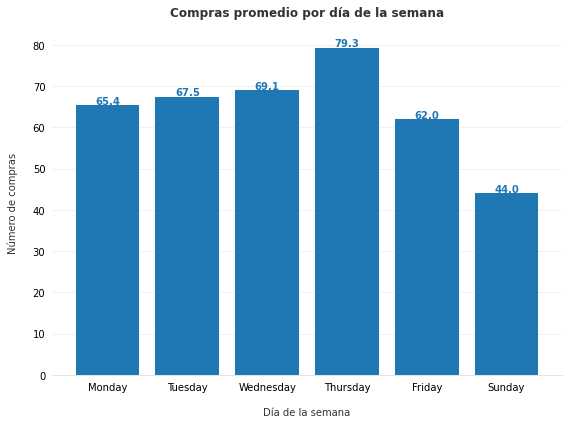

In [18]:
fig, ax = plt.subplots()

bars = ax.bar(
    x=grp_df_temp["WeekDay"],
    height=grp_df_temp["InvoiceMean"]
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

bar_color = bars[0].get_facecolor()
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar_color,
      weight='bold'
  )

ax.set_xlabel('Día de la semana', labelpad=15, color='#333333')
ax.set_ylabel('Número de compras', labelpad=15, color='#333333')
ax.set_title('Compras promedio por día de la semana', pad=15, color='#333333',
             weight='bold')

fig.set_figheight(6)
fig.set_figwidth(8)
fig.tight_layout()

---

Del gráfico podemos inferir que en promedio, la mayor cantidad de compras se realizan los días Jueves y la menor cantidad los días Domingos. Cabe destacar que posterior a la limpieza, no tenemos compras el día sabado. Veamos en el dataset original que registros aparecían este día.

---

In [20]:
# Registros día sabado dataset pre-limpieza
df_retail["CorrectedDatetime"] = pd.to_datetime(df_retail["InvoiceDate"])
df_retail["WeekDay"] = df_retail["CorrectedDatetime"].dt.day_name()
df_retail[df_retail["WeekDay"]=="Saturday"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CorrectedDatetime,WeekDay


---

Al parecer no habían registros los días Sábados desde el inicio, por lo que podemos suponer que la tienda no opera los días Sábados.

---

Veamos ahora los 5 países que más gastan en promedio, para esto haremos 3 análisis:
 - Promedio por registro.
 - Promedio por Invoice.
 - Promedio por día.

---

In [19]:
# Creación de columna pagado por registro

df_retail_dmt_corr["Paid"] = df_retail_dmt_corr["Quantity"] * df_retail_dmt_corr["UnitPrice"]

In [26]:
# Promedio por registro

df_retail_mean_row = df_retail_dmt_corr.groupby(["Country"], as_index = False).agg(
                            PaidMean = pd.NamedAgg("Paid","mean")
                        ).sort_values(by=['PaidMean'], ascending=False)
df_retail_mean_row.head(5)

,Country,PaidMean
24,Netherlands,122.260698
0,Australia,116.995182
20,Japan,116.561900
32,Sweden,86.363129
9,Denmark,49.688907


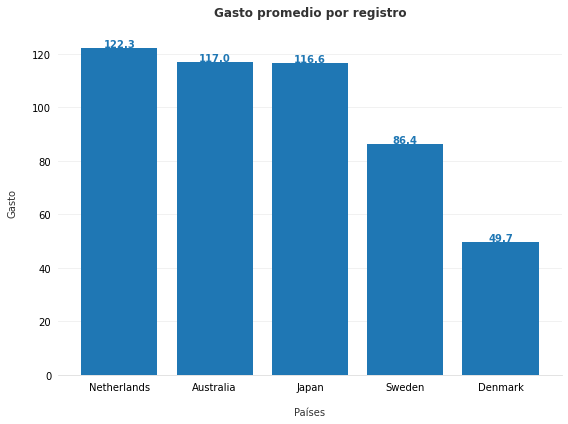

In [28]:
fig, ax = plt.subplots()

bars = ax.bar(
    x=df_retail_mean_row.head(5)["Country"],
    height=df_retail_mean_row.head(5)["PaidMean"]
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

bar_color = bars[0].get_facecolor()
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar_color,
      weight='bold'
  )

ax.set_xlabel('Países', labelpad=15, color='#333333')
ax.set_ylabel('Gasto', labelpad=15, color='#333333')
ax.set_title('Gasto promedio por registro', pad=15, color='#333333',
             weight='bold')

fig.set_figheight(6)
fig.set_figwidth(8)
fig.tight_layout()

---

Al hacer un análisis por registro, podemos darnos cuenta que los Holandeses son los que mas gastan por cada item que compran, seguidos por los Australianos, luego Japoneses, terminando con los Suecos y Daneses. De esto podemos inferir que compran una gran cantidad de items similares, o que compran los items más caros.

---

In [35]:
# Promedio por Invoice

df_retail_mean_invoice = df_retail_dmt_corr.groupby(["Country","InvoiceNo"], as_index = False).agg(
                            PaidInvoice = pd.NamedAgg("Paid","sum")
                        ).groupby(["Country"], as_index = False).agg(
                            PaidMean = pd.NamedAgg("PaidInvoice","mean")).sort_values(by=['PaidMean'], ascending=False)
df_retail_mean_invoice.head(5)

,Country,PaidMean
24,Netherlands,3052.573548
0,Australia,2467.344821
30,Singapore,2275.057500
20,Japan,1969.282632
21,Lebanon,1693.880000


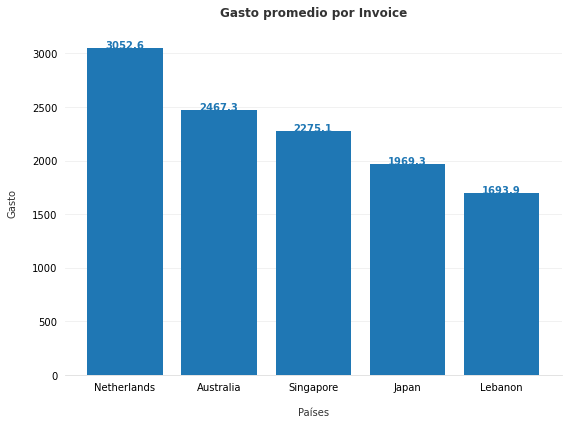

In [36]:
fig, ax = plt.subplots()

bars = ax.bar(
    x=df_retail_mean_invoice.head(5)["Country"],
    height=df_retail_mean_invoice.head(5)["PaidMean"]
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

bar_color = bars[0].get_facecolor()
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar_color,
      weight='bold'
  )

ax.set_xlabel('Países', labelpad=15, color='#333333')
ax.set_ylabel('Gasto', labelpad=15, color='#333333')
ax.set_title('Gasto promedio por Invoice', pad=15, color='#333333',
             weight='bold')

fig.set_figheight(6)
fig.set_figwidth(8)
fig.tight_layout()

---

Al hacer un análisis por Invoice, se mantienen en los dos primeros lugares los Holandeses y Australianos, por lo que las compras de mayor valor las realizan estos países. No obstante los tres lugares siguientes los realizan desde Singapur, Japon y El Líbano, por lo que podemos deducir que estos países realizan compras con muchos items distintos al no aparecer en el ranking anterior.

---

In [37]:
# Promedio por día

df_retail_mean_day = df_retail_dmt_corr.groupby(["Country","OnlyDate"], as_index = False).agg(
                            PaidDay = pd.NamedAgg("Paid","sum")
                        ).groupby(["Country"], as_index = False).agg(
                            PaidMean = pd.NamedAgg("PaidDay","mean")).sort_values(by=['PaidMean'], ascending=False)
df_retail_mean_day.head(5)

,Country,PaidMean
36,United Kingdom,28625.737748
24,Netherlands,4506.180000
0,Australia,3213.286279
30,Singapore,2275.057500
20,Japan,2078.687222


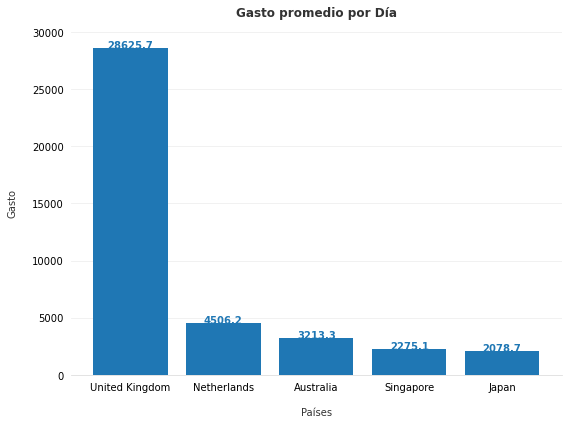

In [38]:
fig, ax = plt.subplots()

bars = ax.bar(
    x=df_retail_mean_day.head(5)["Country"],
    height=df_retail_mean_day.head(5)["PaidMean"]
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

bar_color = bars[0].get_facecolor()
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar_color,
      weight='bold'
  )

ax.set_xlabel('Países', labelpad=15, color='#333333')
ax.set_ylabel('Gasto', labelpad=15, color='#333333')
ax.set_title('Gasto promedio por Día', pad=15, color='#333333',
             weight='bold')

fig.set_figheight(6)
fig.set_figwidth(8)
fig.tight_layout()

---

Por último, al hacer un análisis de gasto promedio al día, entra Reino Unido al primero lugar, y el supuesto es que la tienda se encuentra en este país, por lo que hay muchisimas más compras diarias nacionales que no son de gran gasto, pero que en suma aportan mucho más ingreso que el resto de los países a la tienda.

---

In [44]:
# Total de regalos

df_gift["Quantity"].sum()

15280

---

Podemos ver que se regalaron 15.280 artículos, ahora veamos cuantos se regalaron por mes.

---

In [50]:
# Regalos por mes

df_gift["CorrectedDatetime"] = pd.to_datetime(df_gift["InvoiceDate"])
df_gift["WeekDay"] = df_gift["CorrectedDatetime"].dt.day_name()
df_gift["MonthNumber"] = df_gift["CorrectedDatetime"].dt.month
df_gift["Month"] = df_gift["CorrectedDatetime"].dt.month_name()
df_month_gift = df_gift.groupby(["Month","MonthNumber"], as_index = False).agg(
                    TotalGifts = pd.NamedAgg("Quantity","sum")
                ).sort_values(by = ["MonthNumber"])
df_month_gift

,Month,MonthNumber,TotalGifts
4,January,1,57
3,February,2,105
7,March,3,109
0,April,4,4
8,May,5,195
6,June,6,56
5,July,7,770
1,August,8,861
11,September,9,1
10,October,10,7


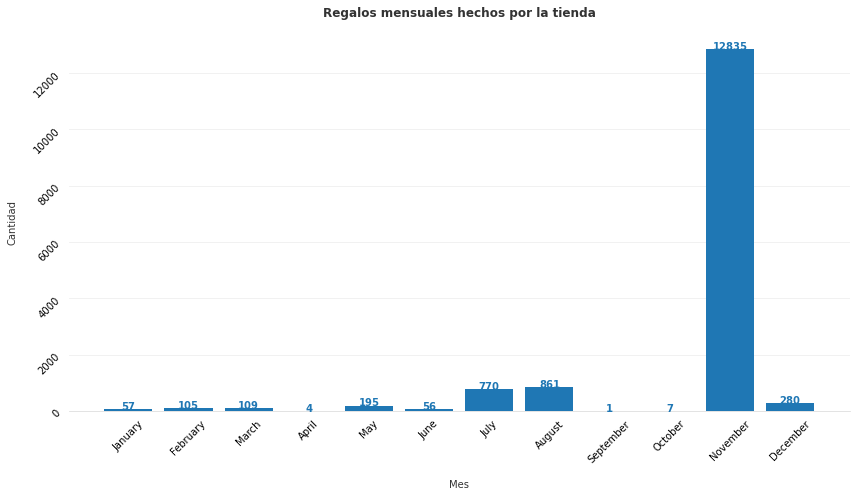

In [59]:
fig, ax = plt.subplots()

bars = ax.bar(
    x=df_month_gift["Month"],
    height=df_month_gift["TotalGifts"]
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

bar_color = bars[0].get_facecolor()
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar_color,
      weight='bold'
  )

ax.set_xlabel('Mes', labelpad=15, color='#333333')
ax.set_ylabel('Cantidad', labelpad=15, color='#333333')
ax.set_title('Regalos mensuales hechos por la tienda', pad=15, color='#333333',
             weight='bold')

ax.tick_params(labelrotation=45)

fig.set_figheight(7)
fig.set_figwidth(12)
fig.tight_layout()

### Segunda parte  
  
Utilizando SegmentationData.csv y obtener la solución de cluster jerárquico para k = 4 y con ella:
 - Poner nombre a los 4 clusters
 - Realizar crosstab (con MBA y Choice)
 - Calcular el test de chi-cuadrado (pearson) para los crosstab (MBA y Choice) con el fin de responder si existe relación entre las variables. ( alfa = 0.05) (no incorporar corrección de Yates)